In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [5]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [6]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [7]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  err = np.sum(err)
  return err

In [8]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [0]:
z = np.linspace(-10, 10, 101)

In [0]:
probabilities = sigmoid(z)

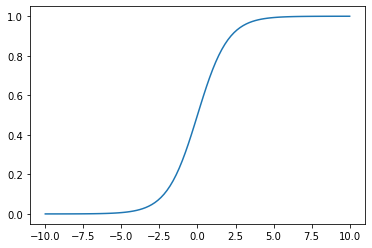

In [22]:
plt.plot(z, probabilities)

In [0]:
### Logistic Regression

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

In [48]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred + 1e-10) + (1.0 - y) * np.log(1.0 - y_pred + 1e-10))
  err = np.sum(err)
  return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [49]:
def eval_model(X, y, iterations, alpha=1e-5):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [55]:
W = eval_model(X_st, y, iterations=2000000, alpha=1e-2)
W

200000 [-16.2422902   -1.86937288  -3.90462901  13.50867797] 0.20874444808703624
400000 [-23.32957684  -2.48701096  -6.00950463  19.2580126 ] 0.1641589267529398
600000 [-28.46471856  -2.94024139  -7.50574487  23.41628013] 0.14096415726392753
800000 [-32.51817754  -3.29802355  -8.67608723  26.68935959] 0.1265923757024486
1000000 [-35.89309329  -3.59424249  -9.64632889  29.40588541] 0.11667083192305631
1200000 [-38.80648653  -3.84765645 -10.48259801  31.74299486] 0.10930307413371172
1400000 [-41.38732662  -4.06961785 -11.22354587  33.8060381 ] 0.10353948423512938
1600000 [-43.71801786  -4.26748123 -11.89355733  35.66237999] 0.09885284920021958
1800000 [-45.8541951   -4.4462719  -12.50892505  37.35754564] 0.09492689936757043
2000000 [-47.83507268  -4.60957408 -13.08102848  38.92366617] 0.09156016528560747


array([-47.83507268,  -4.60957408, -13.08102848,  38.92366617])

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [32]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W,X))

In [56]:
calc_pred_proba(W, X_st)

array([0.33027535, 0.00223266, 1.        , 0.03215099, 0.96673751,
       0.01491377, 1.        , 0.00807267, 0.65518428, 1.        ])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [44]:
def calc_pred(W, X):
    pred_proba = sigmoid(np.dot(W,X))
    output = (pred_proba > 0.5).astype(int)
    return output

In [61]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [71]:
def scores(y,y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y)):
        if y_pred[i] == 1 and y[i] == 1:
            tp += 1
        if y_pred[i] == 0 and y[i] == 0:
            tn += 1
        if y_pred[i] == 1 and y[i] == 0:
            fp += 1
        if y_pred[i] == 0 and y[i] == 1:
            fn +=1 
    
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    conf_matrix = [[tp, fn],[fp, tn]]
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(recall * precision) / (recall + precision)
    
    return accuracy, conf_matrix, precision, recall, f1
    

In [72]:
scores(y, y_pred)

(1.0, [[5, 0], [0, 5]], 1.0, 1.0, 1.0)

6. Могла ли модель переобучиться? Почему?

Могла чуть чуть ) Мы же нормализовали данные, так что сильного переобучения не должно быть